In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'pokemon 5.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [32]:
# Find the Pokémon with the highest attack value
strongest_attack_pokemon = data.loc[data['attack'].idxmax()]

# Extract relevant details
strongest_attack_details = {
    'Name': strongest_attack_pokemon['abilities'],  # Assuming 'abilities' column has Pokémon names or identifiers
    'Pokedex Number': strongest_attack_pokemon['pokedex_number'],
    'Type': (strongest_attack_pokemon['type1'], strongest_attack_pokemon['type2']),
    'Attack': strongest_attack_pokemon['attack'],
    'Generation': strongest_attack_pokemon['generation'],
    'Is Legendary': bool(strongest_attack_pokemon['is_legendary'])
}

strongest_attack_details


{'Name': "['Swarm', 'Guts', 'Moxie']",
 'Pokedex Number': 214,
 'Type': ('bug', 'fighting'),
 'Attack': 185,
 'Generation': 2,
 'Is Legendary': False}

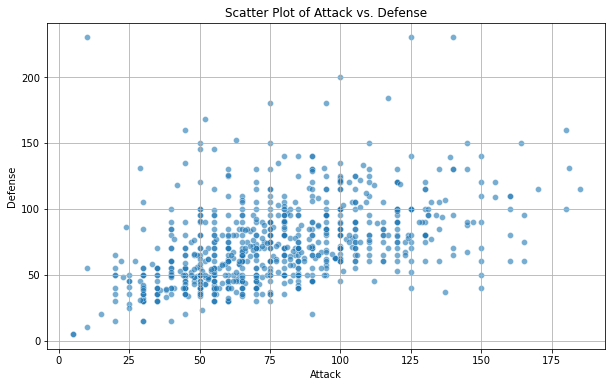

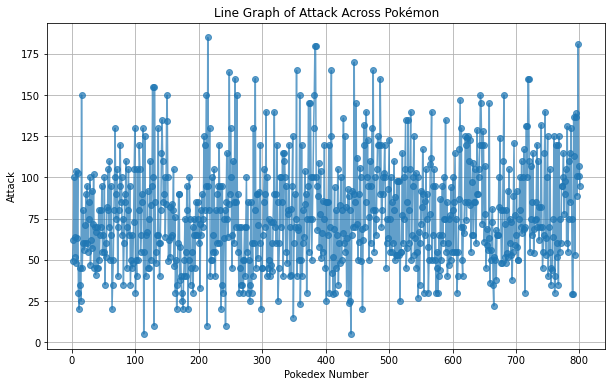

0.46891491391893025

In [33]:
# Scatter Plot: Attack vs. Defense
plt.figure(figsize=(10, 6))
plt.scatter(data['attack'], data['defense'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Attack vs. Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)
plt.show()

# Calculate correlation between attack and defense
correlation_attack_defense = np.corrcoef(data['attack'], data['defense'])[0, 1]

# Line Graph: Attack over different Pokémons
plt.figure(figsize=(10, 6))
plt.plot(data['pokedex_number'], data['attack'], marker='o', linestyle='-', alpha=0.7)
plt.title('Line Graph of Attack Across Pokémon')
plt.xlabel('Pokedex Number')
plt.ylabel('Attack')
plt.grid(True)
plt.show()

correlation_attack_defense



In [34]:
# Calculate the mean values of attack-related attributes
mean_values = {
    'Attack': data['attack'].mean(),
    'Special Attack': data['sp_attack'].mean(),
    'Defense': data['defense'].mean(),
    'Special Defense': data['sp_defense'].mean(),
    'Speed': data['speed'].mean()
}

# Find the strongest attack type
strongest_attack_type = max(mean_values, key=mean_values.get)

mean_values, strongest_attack_type

({'Attack': 77.85767790262172,
  'Special Attack': 71.30586766541823,
  'Defense': 73.00873907615481,
  'Special Defense': 70.91136079900124,
  'Speed': 66.33458177278402},
 'Attack')

In [35]:
# Group the data by type1 and calculate the average attack for each type
average_attack_by_type = data.groupby('type1')['attack'].mean().sort_values(ascending=False)

# Get the top 5 strongest Pokémon types by average attack
top_5_strongest_types = average_attack_by_type.head(5)


top_5_strongest_types



type1
dragon      106.407407
fighting     99.178571
ground       94.812500
steel        93.083333
rock         90.666667
Name: attack, dtype: float64

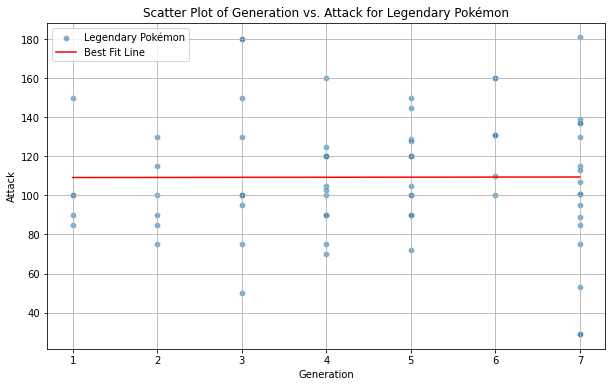

0.0026854558822797642

In [36]:
# Filter the dataset for legendary Pokémon
legendary_pokemon = data[data['is_legendary'] == 1]

# Scatter Plot and Best Fit Line: Generation vs. Attack for Legendary Pokémon
plt.figure(figsize=(10, 6))
plt.scatter(legendary_pokemon['generation'], legendary_pokemon['attack'], alpha=0.6, edgecolors='w', linewidth=0.5, label='Legendary Pokémon')

# Fit a line
m, b = np.polyfit(legendary_pokemon['generation'], legendary_pokemon['attack'], 1)
plt.plot(legendary_pokemon['generation'], m * legendary_pokemon['generation'] + b, color='red', label='Best Fit Line')

plt.title('Scatter Plot of Generation vs. Attack for Legendary Pokémon')
plt.xlabel('Generation')
plt.ylabel('Attack')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation between generation and attack for legendary Pokémon
correlation_legendary_gen_attack = np.corrcoef(legendary_pokemon['generation'], legendary_pokemon['attack'])[0, 1]

correlation_legendary_gen_attack


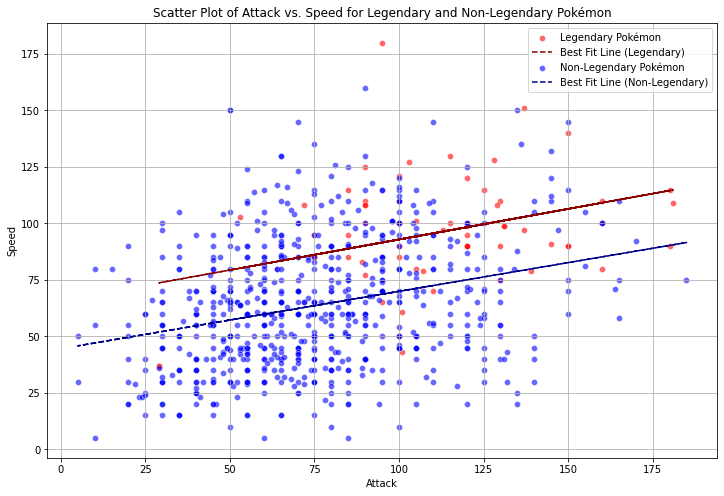

(0.34619762041585744, 0.28010095544059727)

In [37]:
# Scatter Plot and Best Fit Line: Attack vs. Speed for Legendary and Non-Legendary Pokémon

# Separate non-legendary Pokémon
non_legendary_pokemon = data[data['is_legendary'] == 0]

# Plotting
plt.figure(figsize=(12, 8))

# Legendary Pokémon
plt.scatter(
    legendary_pokemon['attack'],
    legendary_pokemon['speed'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5,
    label='Legendary Pokémon',
    color='red'
)

# Best fit line for Legendary Pokémon
m_leg, b_leg = np.polyfit(legendary_pokemon['attack'], legendary_pokemon['speed'], 1)
plt.plot(
    legendary_pokemon['attack'],
    m_leg * legendary_pokemon['attack'] + b_leg,
    color='darkred',
    linestyle='--',
    label='Best Fit Line (Legendary)'
)

# Non-Legendary Pokémon
plt.scatter(
    non_legendary_pokemon['attack'],
    non_legendary_pokemon['speed'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5,
    label='Non-Legendary Pokémon',
    color='blue'
)

# Best fit line for Non-Legendary Pokémon
m_non_leg, b_non_leg = np.polyfit(non_legendary_pokemon['attack'], non_legendary_pokemon['speed'], 1)
plt.plot(
    non_legendary_pokemon['attack'],
    m_non_leg * non_legendary_pokemon['attack'] + b_non_leg,
    color='darkblue',
    linestyle='--',
    label='Best Fit Line (Non-Legendary)'
)

plt.title('Scatter Plot of Attack vs. Speed for Legendary and Non-Legendary Pokémon')
plt.xlabel('Attack')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation for legendary and non-legendary Pokémon
correlation_legendary_attack_speed = np.corrcoef(legendary_pokemon['attack'], legendary_pokemon['speed'])[0, 1]
correlation_non_legendary_attack_speed = np.corrcoef(non_legendary_pokemon['attack'], non_legendary_pokemon['speed'])[0, 1]

correlation_legendary_attack_speed, correlation_non_legendary_attack_speed


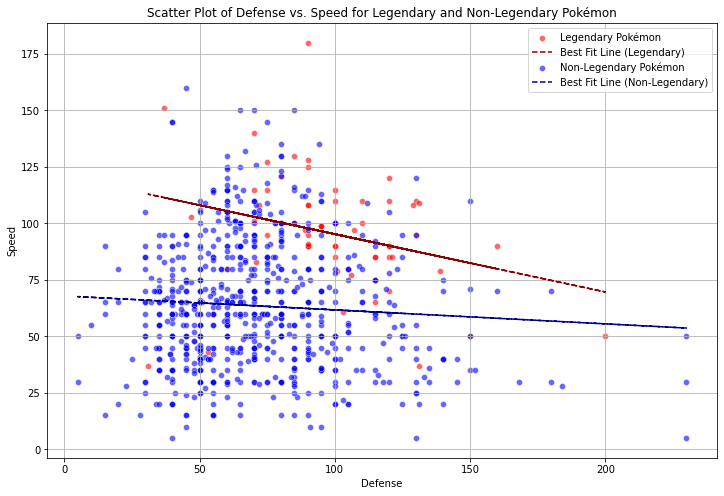

(-0.27962789337817395, -0.06671547132312498)

In [38]:
# Scatter Plot and Best Fit Line: Defense vs. Speed for Legendary and Non-Legendary Pokémon

plt.figure(figsize=(12, 8))

# Legendary Pokémon
plt.scatter(
    legendary_pokemon['defense'],
    legendary_pokemon['speed'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5,
    label='Legendary Pokémon',
    color='red'
)

# Best fit line for Legendary Pokémon
m_leg_def, b_leg_def = np.polyfit(legendary_pokemon['defense'], legendary_pokemon['speed'], 1)
plt.plot(
    legendary_pokemon['defense'],
    m_leg_def * legendary_pokemon['defense'] + b_leg_def,
    color='darkred',
    linestyle='--',
    label='Best Fit Line (Legendary)'
)

# Non-Legendary Pokémon
plt.scatter(
    non_legendary_pokemon['defense'],
    non_legendary_pokemon['speed'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5,
    label='Non-Legendary Pokémon',
    color='blue'
)

# Best fit line for Non-Legendary Pokémon
m_non_leg_def, b_non_leg_def = np.polyfit(non_legendary_pokemon['defense'], non_legendary_pokemon['speed'], 1)
plt.plot(
    non_legendary_pokemon['defense'],
    m_non_leg_def * non_legendary_pokemon['defense'] + b_non_leg_def,
    color='darkblue',
    linestyle='--',
    label='Best Fit Line (Non-Legendary)'
)

plt.title('Scatter Plot of Defense vs. Speed for Legendary and Non-Legendary Pokémon')
plt.xlabel('Defense')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation for defense vs. speed
correlation_legendary_defense_speed = np.corrcoef(legendary_pokemon['defense'], legendary_pokemon['speed'])[0, 1]
correlation_non_legendary_defense_speed = np.corrcoef(non_legendary_pokemon['defense'], non_legendary_pokemon['speed'])[0, 1]

correlation_legendary_defense_speed, correlation_non_legendary_defense_speed


In [29]:
import numpy as np

# Remove rows with missing or infinite values in 'hp' or 'weight_kg'
clean_data = data.dropna(subset=['hp', 'weight_kg'])

# Calculate the correlation between HP and Weight for the cleaned dataset
correlation_hp_weight_clean = np.corrcoef(clean_data['hp'], clean_data['weight_kg'])[0, 1]

correlation_hp_weight_clean

0.4277434873000234

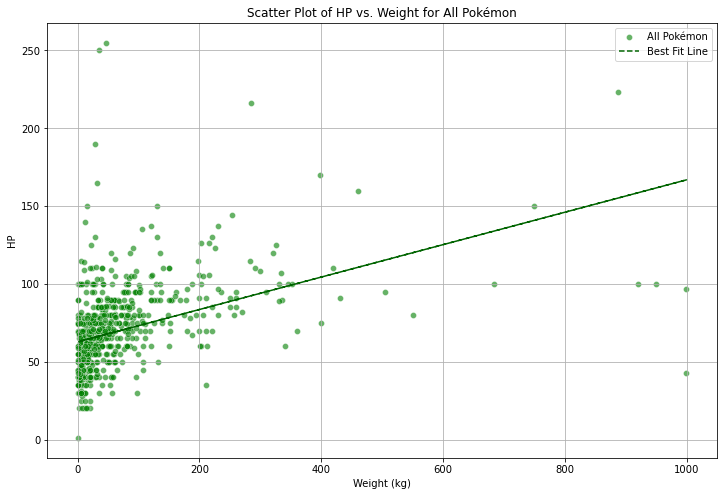

In [40]:
# Scatter Plot and Best Fit Line: HP vs. Weight for All Pokémon

plt.figure(figsize=(12, 8))

# Plot all Pokémon
plt.scatter(
    clean_data['weight_kg'],
    clean_data['hp'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5,
    color='green',
    label='All Pokémon'
)

# Best fit line for all Pokémon
m_hp_weight, b_hp_weight = np.polyfit(clean_data['weight_kg'], clean_data['hp'], 1)
plt.plot(
    clean_data['weight_kg'],
    m_hp_weight * clean_data['weight_kg'] + b_hp_weight,
    color='darkgreen',
    linestyle='--',
    label='Best Fit Line'
)

plt.title('Scatter Plot of HP vs. Weight for All Pokémon')
plt.xlabel('Weight (kg)')
plt.ylabel('HP')
plt.legend()
plt.grid(True)
plt.show()
